# Monetary growth
This notebook has the following goals:
- To show the differences in the growth of the quantity of money in different economies.
- To establish a relationship between growth of the quantity of money, velocity of money and inflation.
The following monetary areas will be studied: the United States, the euro area, Switzerland, the United Kingdom and Japan.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

from utils import add_recessions, plot_recessions

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

PLOTS_PATH = 'figures'

In [3]:
df_us = pd.read_pickle('data/us.pickle')
df_eu = pd.read_pickle('data/eu.pickle')
df_ch = pd.read_pickle('data/ch.pickle')
df_uk = pd.read_pickle('data/uk.pickle')
df_jp = pd.read_pickle('data/jp.pickle')

## Exploratory Data Analysis

/var/folders/q8/gp6z9yks6ynf_34chydw0yrr0000gn/T/ipykernel_76841/1721722650.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_uk['cpi'].pct_change(periods=12).plot(ax=ax, label='UK')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


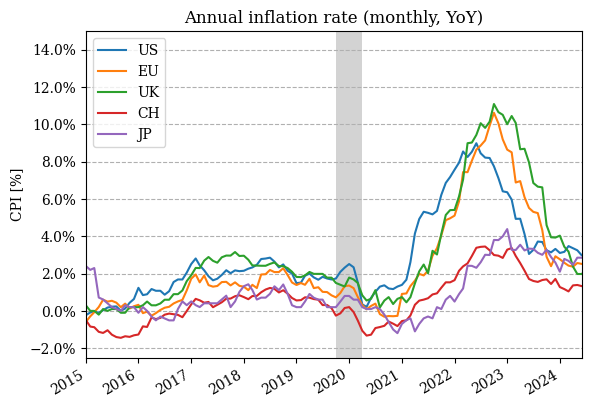

In [4]:
fig, ax = plt.subplots()

df_us['cpi'].pct_change(periods=12).plot(ax=ax, label='US')
df_eu['cpi'].pct_change(periods=12).plot(ax=ax, label='EU')
df_uk['cpi'].pct_change(periods=12).plot(ax=ax, label='UK')
df_ch['cpi'].pct_change(periods=12).plot(ax=ax, label='CH')
df_jp['cpi'].pct_change(periods=12).plot(ax=ax, label='JP')

plot_recessions(ax)

ax.set_xlim(['2015', '2024-06'])
ax.set_ylim([-.025, .15])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(which='major', axis='y', linestyle='--')  #  or bothdd
ax.set_title('Annual inflation rate (monthly, YoY)')
ax.set_xlabel('')
ax.set_ylabel('CPI [%]')
ax.legend();

fig.savefig(f'{PLOTS_PATH}/inflation.eps', bbox_inches='tight')
fig.savefig(f'{PLOTS_PATH}/inflation.svg', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


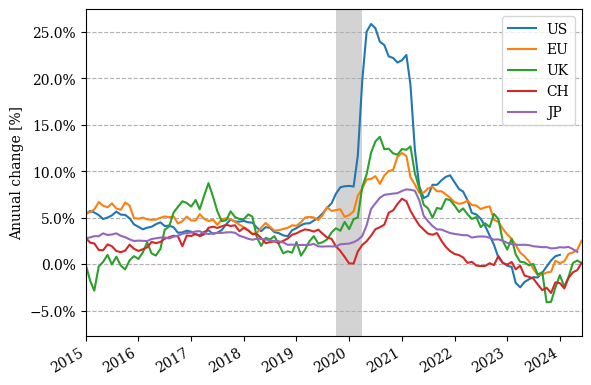

In [5]:
fig, ax = plt.subplots()

df_us['m3'].pct_change(periods=12, fill_method=None).plot(ax=ax, label='US')
df_eu['m3'].pct_change(periods=12, fill_method=None).plot(ax=ax, label='EU')
df_uk['m3'].pct_change(periods=12, fill_method=None).plot(ax=ax, label='UK')
df_ch['m3'].pct_change(periods=12, fill_method=None).plot(ax=ax, label='CH')
df_jp['m3'].pct_change(periods=12, fill_method=None).plot(ax=ax, label='JP')
plot_recessions(ax)

ax.set_xlim(['2015', '2024-06'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(which='major', axis='y', linestyle='--')  #  or bothdd
ax.set_xlabel('')
ax.set_ylabel('Anuual change [%]')
# ax.set_title('Cambios en la oferta de dinero para diferentes áreas monetarias');
ax.legend();
fig.savefig(f'{PLOTS_PATH}/money-supply.eps', bbox_inches='tight')
fig.savefig(f'{PLOTS_PATH}/money-supply.svg', bbox_inches='tight')

## Money velocity growth analysis

### Hypothesis test

$H_0$: Mean value of $\Delta\log(v_t)$ is zero.

Null hypothesis is rejected with a significance level of 99%.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


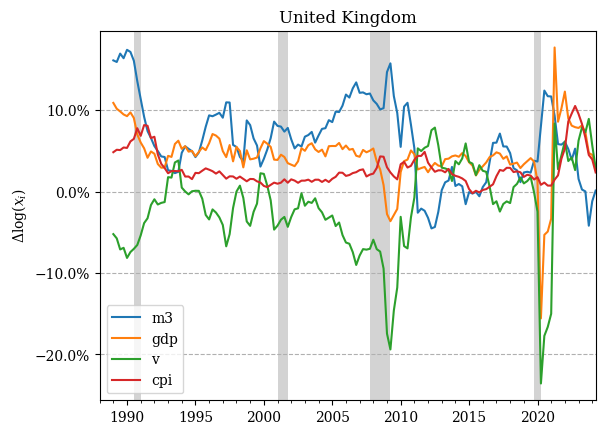

In [6]:
# df_deltaLog = df_ch[['m3', 'gdp', 'v']].dropna().apply(np.log).diff(periods=4)
# df_deltaLog['cpi'] = df_eu['cpi']/100

df_deltaLog = df_uk[['m3', 'gdp', 'v', 'cpi']].dropna().apply(np.log).diff(periods=4)
region = 'uk'

regions = {
  'us': 'Estados Unidos',
  'eu': 'Eurozona',
  'ch': 'Suiza',
  'uk': 'Reino Unido',
  'jp': 'Japón'
}

regions = {
  'us': 'United States',
  'eu': 'Euro area',
  'ch': 'Switzerland',
  'uk': 'United Kingdom',
  'jp': 'Japan'
}

add_recessions(df_deltaLog)

fig, ax = plt.subplots()
df_deltaLog[['m3', 'gdp', 'v', 'cpi']].plot(ax=ax)
plot_recessions(ax)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(which='major', axis='y', linestyle='--')  #  or both
ax.set_xlabel('')
ax.set_ylabel(r'$\Delta\log(x_i)$');
ax.set_title(regions[region])

fig.savefig(f'{PLOTS_PATH}/magnitudes-{region}.eps', bbox_inches='tight')
fig.savefig(f'{PLOTS_PATH}/magnitudes-{region}.svg', bbox_inches='tight')

In [7]:
from scipy.stats import t

mu_0 = 0
mean_yi = df_deltaLog['v'].mean()
sm_yi = df_deltaLog['v'].std()
T = df_deltaLog['v'].count()  #  Excluye valores N/A
sm_medias = sm_yi / np.sqrt(T)

t_score = (mean_yi - mu_0) / sm_medias
p_value = 2*t.sf(np.abs(t_score), T-1)
print(f'p-value: {p_value:.5f}')
# Se rechaza H0: mu0=0 al 99%

print(f'mu = {mean_yi*100:.2f}%')
print(
    f"mu = {df_deltaLog.loc[:'2019-12-31', 'v'].mean()*100:.2f}% (hasta 2019.IV)")

print(f'std = {sm_yi*100:.2f}%')
print(
    f"std = {df_deltaLog.loc[:'2019-12-31', 'v'].std()*100:.2f}% (hasta 2019.IV)")

p-value: 0.00023
mu = -1.79%
mu = -2.02% (hasta 2019.IV)
std = 5.64%
std = 4.61% (hasta 2019.IV)


In [8]:
# %% Augmented Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_deltaLog['v'].dropna(), regression='c', autolag='AIC')
print('Augmented Dickey-Fuller')
print(f'\tADF statistic: {result[0]}')
print(f'\tp-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Augmented Dickey-Fuller
	ADF statistic: -2.7707314958041036
	p-value: 0.06257771772081062
Critical Values:
	1%: -3.483
	5%: -2.885
	10%: -2.579


In [9]:
from statsmodels.tsa.stattools import kpss

result = kpss(df_deltaLog['v'].dropna(), regression='c', nlags='auto');

print('KPSS')
print(f'\tKPSS statistic: {result[0]}')
print(f'\tp-value: {result[1]}')
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS
	KPSS statistic: 0.24153234287999428
	p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/q8/gp6z9yks6ynf_34chydw0yrr0000gn/T/ipykernel_76841/2668863701.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df_deltaLog['v'].dropna(), regression='c', nlags='auto');


### Markov switching model

$\Delta\log v_t = \mu_{S_t} + \beta d_\text{recession} + \varepsilon_t$

$\varepsilon_t \sim N(0, \sigma^2)$

$S_t\in \{0,1\}$

$P(S_t=s_t|S_{t-1}=s_{t-1})=
\begin{bmatrix}
  p_{00} & p_{10}\\
  1-p_{00} & 1-p_{10}
\end{bmatrix}$

$p_ij$ is the probability of transitioning from regime $i$ to regime $j$.

References:
- Reference: https://stackoverflow.com/questions/42796743/python-statsmodel-tsa-markovautoregression-using-current-real-gnp-gdp-data
- Reference: https://nbviewer.org/gist/ChadFulton/a5d24d32ba3b7b2e381e43a232342f1f
- statsmodels: https://www.statsmodels.org/dev/generated/statsmodels.tsa.regime_switching.markov_autoregression.MarkovAutoregression.html
- statsmodels: https://www.statsmodels.org/dev/examples/notebooks/generated/markov_autoregression.html
- statsmodels: https://www.statsmodels.org/dev/examples/notebooks/generated/markov_regression.html
- mswitch (Stata): https://www.stata.com/manuals14/tsmswitch.pdf


In [10]:
import statsmodels.api as sm

y = df_deltaLog.dropna()['v'].astype(float)
X = df_deltaLog.dropna()['recession'].astype(float)
# X = sm.add_constant(X) # Not to be included if the option trend='c' is specified at MarkovRegression

model = sm.tsa.MarkovRegression(
    y, k_regimes=2,
    exog=X,  
    switching_exog=False,
    # switching_trend=False,
    trend='c'
)
res = model.fit()

print(f'Estimated duration: {res.expected_durations}')
res.summary()

Estimated duration: [25.81475355  7.15242535]


/Users/miguel/Documents/workspace/money-growth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      v   No. Observations:                  142
Model:               MarkovRegression   Log Likelihood                 251.183
Date:                Wed, 13 Nov 2024   AIC                           -490.367
Time:                        20:29:58   BIC                           -472.632
Sample:                    01-01-1989   HQIC                          -483.160
                         - 04-01-2024                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.004      2.206      0.027       0.001       0.017
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0847      0.010     -8.580      0.000      -0.104      -0.065
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0692      0.010     -6.755      0.000      -0.089      -0.049
sigma2         0.0012      0.000      7.979      0.000       0.001       0.002
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9613      0.020     48.998      0.000       0.923       1.000
p[1->0]        0.1398      0.069      2.030      0.042       0.005       0.275
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [11]:
y_hat = res.predict()
y_mean = y.mean()

sst = ((y-y_mean)**2).sum()
sse = ((y-y_hat)**2).sum()
ssr = ((y_hat-y_mean)**2).sum()
r2 = 1-sse/sst

print(f'R^2 = {r2:.4f}')

print(f'SST = {sst:.4f}')
print(f'SSE = {sse:.4f}')
print(f'SSR = {ssr:.4f}')

R^2 = 0.6662
SST = 0.4486
SSE = 0.1497
SSR = 0.2459


In [12]:
res.params.map('{:,.3f}'.format) + res.pvalues.map(' ({:,.3f})'.format)

print('Numerical values:')
params = ['const[0]', 'const[1]', 'x1[1]', 'p[0->0]', 'p[1->0]']
for param in params:
  print(f'{res.params[param]:.3f}\n({res.pvalues[param]:.3f})')
print(f'{r2:.3f}')

Numerical values:
0.009
(0.027)
-0.085
(0.000)
-0.069
(0.000)
0.961
(0.000)
0.140
(0.042)
0.666


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


R^2 = 0.6662


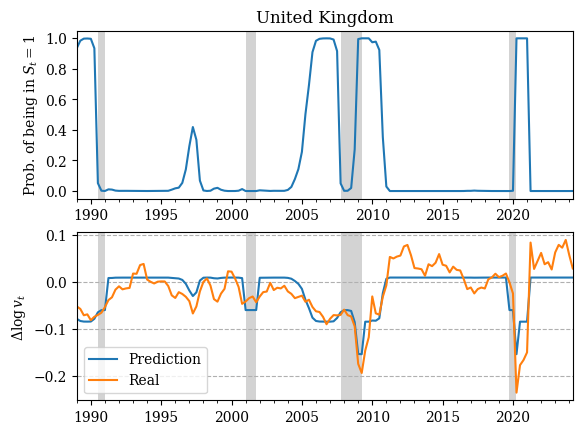

In [13]:
fig, ax =plt.subplots(2)
ax[0].set_title(regions[region])
res.smoothed_marginal_probabilities[1].plot(
    ylabel="Prob. of being in $S_t=1$", ax=ax[0]
)
plot_recessions(ax[0])
ax[0].set_xlabel('')

y_hat.plot(ax=ax[1], label='Prediction')
y.plot(ax=ax[1], label='Real')
plot_recessions(ax[1])

ax[1].grid(which='major', axis='y', linestyle='--')  #  or both
ax[1].set_xlabel('')
ax[1].set_ylabel(r'$\Delta\log v_t$');
ax[1].legend()

fig.savefig(f'{PLOTS_PATH}/markov-v-{region}.eps', bbox_inches='tight')
fig.savefig(f'{PLOTS_PATH}/markov-v-{region}.svg', bbox_inches='tight')
print(f'R^2 = {r2:.4f}')

## Inflation switching model

In [14]:
y = df_deltaLog.dropna()['cpi'].astype(float)
X = df_deltaLog.dropna()[['v', 'm3']].astype(float)

max_lags = 2

for i in range(1, max_lags+1):
    X[f'v_lag_{i}'] = X['v'].shift(i)

for i in range(1, max_lags+1):
    X[f'm3_lag_{i}'] = X['m3'].shift(i)

y = y[max_lags:]
X = X.iloc[max_lags:]
# X.drop('v', axis=1, inplace=True)

model = sm.tsa.MarkovRegression(
    y, k_regimes=2,
    exog=X,  
    # switching_exog={'v': False, 'm3': True},
    switching_exog=[False] * (max_lags + 1) + [True] * (max_lags+1),
    # switching_trend=False,
    trend='c'
)
res = model.fit()

print(f'Estimated duration: {res.expected_durations}')
res.summary()

Estimated duration: [35.93822402 16.79885601]


/Users/miguel/Documents/workspace/money-growth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                    cpi   No. Observations:                  140
Model:               MarkovRegression   Log Likelihood                 434.331
Date:                Wed, 13 Nov 2024   AIC                           -840.662
Time:                        20:29:58   BIC                           -799.479
Sample:                    07-01-1989   HQIC                          -823.927
                         - 04-01-2024                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.003      1.221      0.222      -0.002       0.009
x4             0.0977      0.037      2.663      0.008       0.026       0.170
x5             0.1467      0.100      1.463      0.143      -0.050       0.343
x6             0.1201      0.078      1.536      0.125      -0.033       0.273
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0181      0.003      5.611      0.000       0.012       0.024
x4             0.4350      0.054      8.057      0.000       0.329       0.541
x5            -0.0690      0.091     -0.762      0.446      -0.247       0.109
x6             0.6418      0.085      7.569      0.000       0.476       0.808
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0507      0.037      1.379      0.168      -0.021       0.123
x2             0.0265      0.070      0.381      0.703      -0.110       0.163
x3             0.0354      0.040      0.894      0.372      -0.042       0.113
sigma2      9.284e-05   1.14e-05      8.119      0.000    7.04e-05       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9722      0.016     59.942      0.000       0.940       1.004
p[1->0]        0.0595      0.037      1.622      0.105      -0.012       0.131
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [15]:
y_hat = res.predict()
y_mean = y.mean()

sst = ((y-y_mean)**2).sum()
sse = ((y-y_hat)**2).sum()
ssr = ((y_hat-y_mean)**2).sum()
r2 = 1-sse/sst

print(f'R^2 = {r2:.4f}')

print(f'SST = {sst:.4f}')
print(f'SSE = {sse:.4f}')
print(f'SSR = {ssr:.4f}')

R^2 = 0.8106
SST = 0.0602
SSE = 0.0114
SSR = 0.0456


In [16]:
# print(res.params.map('{:,.3f}'.format) + res.pvalues.map(' ({:,.3f})'.format))

print('Numerical values:')
params = ['const[0]', 'x4[0]', 'x5[0]', 'x6[0]', 'const[1]', 'x4[1]', 'x5[1]', 'x6[1]', 'x1[1]', 'x2[1]', 'x3[1]', 'p[0->0]', 'p[1->0]']
for param in params:
  print(f'{res.params[param]:.3f}\n({res.pvalues[param]:.3f})')
print(f'{r2:.3f}')

Numerical values:
0.003
(0.222)
0.098
(0.008)
0.147
(0.143)
0.120
(0.125)
0.018
(0.000)
0.435
(0.000)
-0.069
(0.446)
0.642
(0.000)
0.051
(0.168)
0.027
(0.703)
0.035
(0.372)
0.972
(0.000)
0.060
(0.105)
0.811


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


R^2 = 0.8106


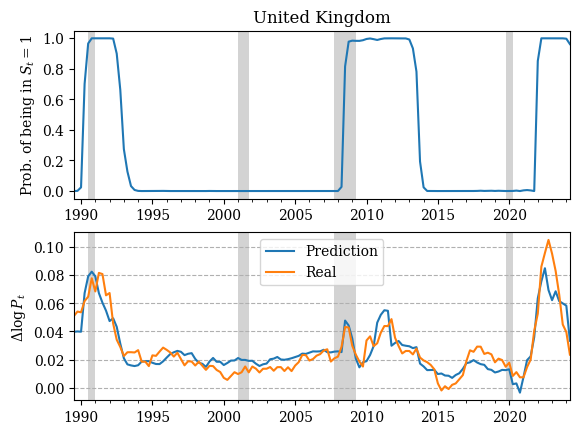

In [17]:
fig, ax =plt.subplots(2)
ax[0].set_title(regions[region])
res.smoothed_marginal_probabilities[1].plot(
    ylabel="Prob. of being in $S_t=1$", ax=ax[0]
)
plot_recessions(ax[0])
ax[0].set_xlabel('')

y_hat.plot(ax=ax[1], label='Prediction')
y.plot(ax=ax[1], label='Real')
plot_recessions(ax[1])

ax[1].grid(which='major', axis='y', linestyle='--')  #  or both
ax[1].set_xlabel('')
ax[1].set_ylabel(r'$\Delta\log P_t$');
ax[1].legend()

fig.savefig(f'{PLOTS_PATH}/markov-cpi-{region}.eps', bbox_inches='tight')
fig.savefig(f'{PLOTS_PATH}/markov-cpi-{region}.svg', bbox_inches='tight')
print(f'R^2 = {r2:.4f}')